<a href="https://colab.research.google.com/github/joaovitor-lemes/Projetos/blob/main/Segmentacao_de_Clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentação de Clientes

Em um mundo cada vez mais competitivo, tratar todos os clientes da mesma forma pode limitar o potencial do seu negócio. É aqui que a segmentação de clientes entra em cena. Mas por que segmentar é tão importante?



##Entendendo o que é Segmentação


Segmentar significa dividir seus clientes em grupos com características semelhantes, como comportamento de compra, preferências ou necessidades. Esse processo permite personalizar estratégias, otimizando recursos e aumentando a satisfação.

<center><img alt="Analisando Airbnb" width="30%" src="https://img.freepik.com/fotos-gratis/bonecas-de-pano-cinzento-em-alvos_1156-697.jpg?uid=R36137244&ga=GA1.1.1073424300.1736968032&semt=ais_hybrid"></center>

## Benefícios da Segmentação

✅ **Ações mais personalizadas e eficazes** <br>
Com a segmentação, você consegue criar campanhas de marketing direcionadas e ofertas que atendem exatamente às expectativas de cada grupo. Um cliente que busca preço baixo espera algo diferente de quem valoriza exclusividade.

✅ **Melhoria na experiência do cliente** <br>
Quando você entende o que o cliente realmente quer, pode oferecer produtos ou serviços mais alinhados às necessidades dele. Isso gera fidelidade e fortalece o relacionamento.

✅ **Aumento na lucratividade**<br>
Nem todos os clientes têm o mesmo impacto no faturamento. Com a segmentação, é possível identificar os grupos mais rentáveis e direcionar esforços para maximizar o retorno.

✅ **Tomada de decisão mais estratégica**<br>
Decisões baseadas em dados de segmentação são mais precisas. Você pode priorizar ações, prever tendências e identificar novas oportunidades de mercado.<br>
<br>
Nesse contexto, você já ouviu falar na análise RFM?

## Análise RFM

<center><img alt="Analisando Airbnb" width="30%" src="https://img.freepik.com/fotos-gratis/conceito-de-rede-variedade-de-naturezas-mortas_23-2149035672.jpg?t=st=1737412280~exp=1737415880~hmac=1729c3905114fc25a8387b2d54a7890425ae5790bea6722482fe3b5cf7957215&w=1380"></center>

A análise **RFM (Recência, Frequência e Valor Monetário)** é uma poderosa ferramenta de segmentação de clientes que permite às empresas identificar padrões de comportamento e tomar decisões mais estratégicas. Trata-se de uma metodologia amplamente utilizada em marketing e gestão de clientes para aumentar a retenção, melhorar a personalização e impulsionar as vendas. Vamos explorar cada componente da RFM e seus benefícios em detalhes:

####**Recência (R)**:


Mede o tempo desde a última interação do cliente com a empresa.

Exemplo: Quando foi a última compra ou visita ao site?
Por que é importante? Clientes que interagiram recentemente têm maior probabilidade de responder a campanhas ou continuar engajados.


---


####**Frequência (F)**:
Refere-se ao número de vezes que o cliente comprou ou interagiu dentro de um período definido.

Exemplo: Quantas compras foram feitas nos últimos seis meses?
Por que é importante? Clientes frequentes tendem a ser mais leais e rentáveis para o negócio.


---


####**Valor Monetário (M)**: Representa o total gasto pelo cliente durante o período de análise.

Exemplo: Qual foi o valor total gasto por esse cliente?
Por que é importante? Clientes que gastam mais geralmente geram maior margem de lucro e devem receber atenção especial.

## Obtenção dos Dados

Os dados foram obtidos a partir de consultas ao Banco de Dados, de tal forma que nas queries feitas em SQL já foram obtidos os valores de Recência, Frequência e Valor Gasto. Os valores de Input para o algoritmo de segmentação foram essas 3 variáveis. O objetivo era saber quais os melhores clientes de uma rede de farmácia, sendo utilizados os parâmetros da quantidade de vezes que o cliente comprou na loja, a data da última compra menos a data do dia em análise, em dias, e o total gasto pelo cliente em medicamentos.

## Identificação dos Dados

> É muito importante entender as váriáveis do projeto e o que elas representam, para tanto, preparei um índice explicativo de cada variável para orientar o leitor sobre os dados de cada coluna.


**Dicionário das variáveis**

* `codigo` - número gerado em ordem crescente para facilitar a querie
* `cdcli` - id do cliente
* `nome` - nome do cliente
* `frequenciareq` - quantidade de vezes que o cliente comprou na rede
* `valortot` - valor total que o cliente já gastou na rede
* `valordesc` - valor total de desconto que o cliente já recebeu na rede
* `sexo` - sexo do cliente
* `bairro` - nome do bairro
* `municipio` - nome do município que o cliente mora
* `estado` - nome do estado que o cliente mora

Antes de iniciar qualquer análise, vamos importar as bibliotecas que utilizaremos e verificar o nosso *dataset*, analisando as 5 primeiras entradas.

In [2]:
# Importando as Bibliotecas que serão utilizadas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
warnings.filterwarnings("ignore")

In [3]:
# Importando os dados e lendo as 5 primeiras linhas

df = pd.read_csv('rfm.csv', encoding='latin-1', sep=';')
df.head()

,codigo,cdcli,nome,recencia,frerquenciareq,valortot,valordesc,sexo,bairro,municipio,estado
0,1,2,CLIENTE 1,176,46,5693.85,356.95,F,SAO FRANCISCO,GOIÂNIA,GO
1,2,5,CLIENTE 2,9,56,13621.23,1497.82,F,JARDIM GOIAS,GOIÂNIA,GO
2,3,6,CLIENTE 3,1183,3,179.80,0.00,F,JD MONASA,APARECIDA DE GOIÂNIA,GO
3,4,10,CLIENTE 4,62,87,6886.22,829.93,F,CENTRO,ANAPOLIS,GO
4,5,13,CLIENTE 5,1740,3,160.40,0.00,M,JD. AMERICA,GOIÂNIA,GO


In [4]:
# Verificando os tipos de dados de cada variável

df.dtypes

,0
codigo,int64
cdcli,int64
nome,object
recencia,int64
frerquenciareq,int64
valortot,float64
valordesc,float64
sexo,object
bairro,object
municipio,object


In [5]:
# Verificando informações sobre a quantidade de valores ausentes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264961 entries, 0 to 264960
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   codigo          264961 non-null  int64  
 1   cdcli           264961 non-null  int64  
 2   nome            264961 non-null  object 
 3   recencia        264961 non-null  int64  
 4   frerquenciareq  264961 non-null  int64  
 5   valortot        264961 non-null  float64
 6   valordesc       264961 non-null  float64
 7   sexo            264858 non-null  object 
 8   bairro          264844 non-null  object 
 9   municipio       264844 non-null  object 
 10  estado          264842 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 22.2+ MB


### **Qual o tipo de distribuição das variáveis?**

Para identificar a distribuição das variáveis, vamos plotar o histograma.

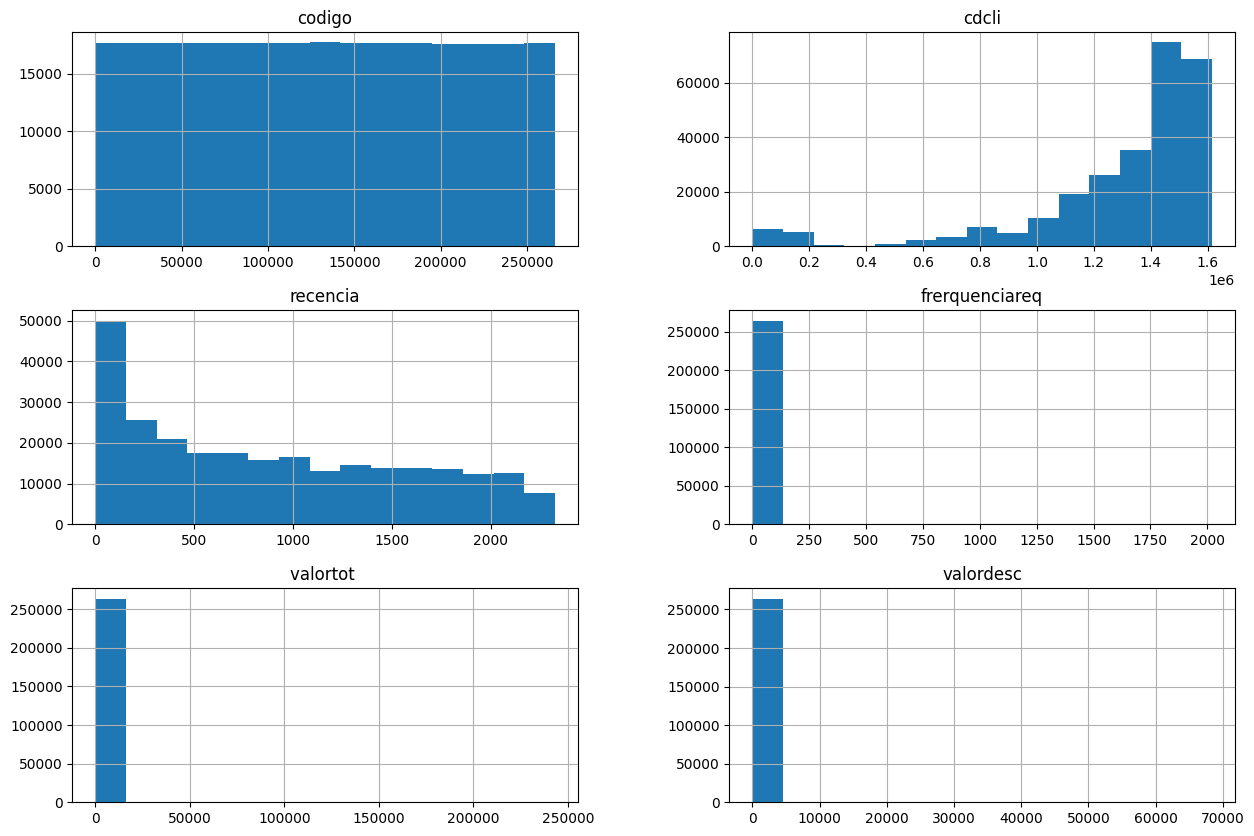

In [6]:
# Plotando um histograma para a distribuição das variáveis

df.hist(bins = 15, figsize=(15, 10))
plt.show()

### **Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `frquenciareq` e `valortot`.

Os valores não seguem uma distribuição e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável

In [7]:
df[['recencia', 'frerquenciareq','valortot ']].describe()

,recencia,frerquenciareq,valortot
count,264961.000000,264961.000000,264961.000000
mean,892.939210,4.913455,974.899698
std,688.684032,10.377444,2653.955807
min,0.000000,1.000000,11.000000
25%,247.000000,1.000000,121.300000
50%,784.000000,2.000000,300.000000
75%,1472.000000,5.000000,853.000000
max,2323.000000,2020.000000,243143.420000


Aqui já percebemos a presença de *outliers* nas variáveis `frequenciareq` e `valortot`. Pelo visto, `recencia` não apresenta *outliers*, vamos plotar os *Boxplots* para confirmar...

### **Plotando e analisando os *Boxplots***

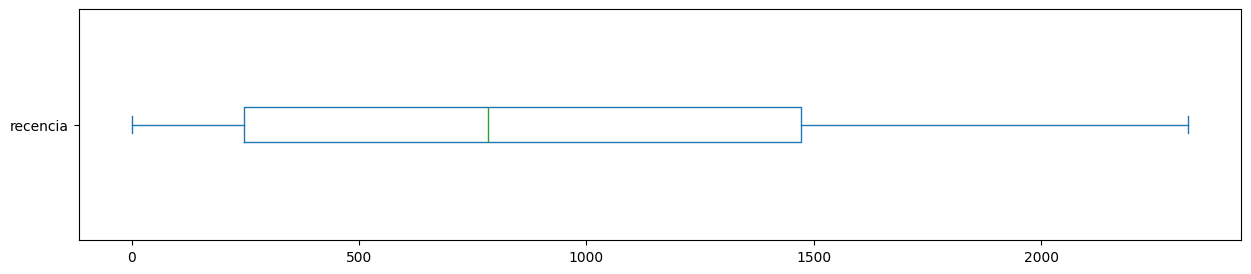

In [8]:
# analisando a recencia

df.recencia.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

Frequenciareq: valores acima de 100:
1721 entradas
0.6495%


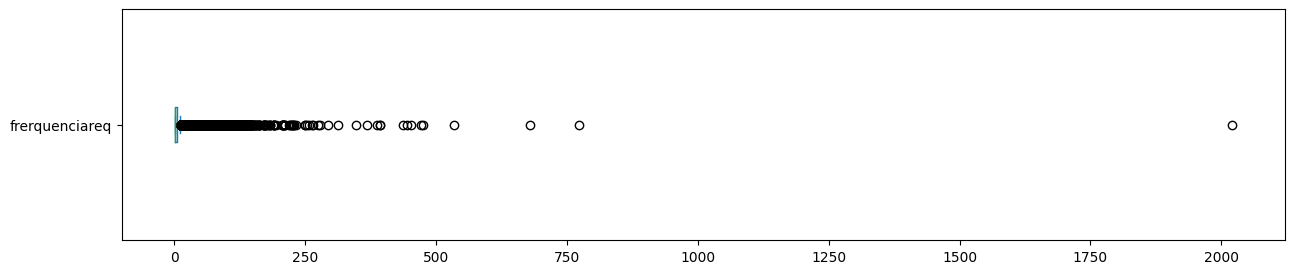

In [9]:
# analisando a Frequenciareq

df.frerquenciareq.plot(kind='box', vert=False, figsize=(15, 3))

# ver quantidade de valores acima de 100 para Frequenciareq

print("Frequenciareq: valores acima de 100:")
print("{} entradas".format(len(df[df.frerquenciareq > 50])))
print("{:.4f}%".format((len(df[df.frerquenciareq > 50]) / df.shape[0])*100))
plt.show()

Valortot: valores acima de 10000:
2805 entradas
1.0586%


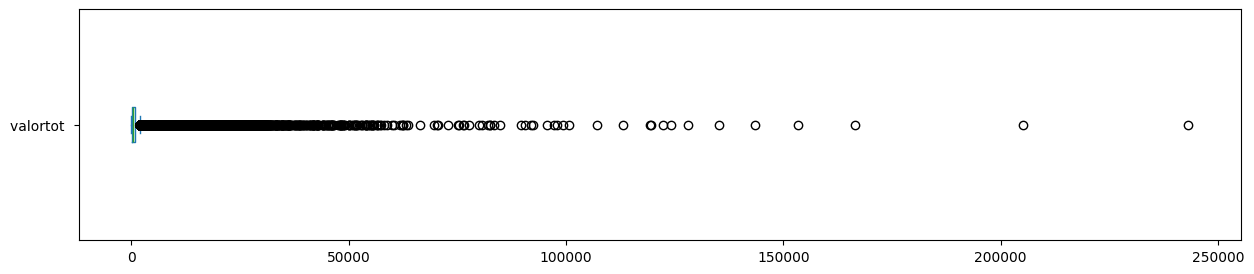

In [10]:
# analisando o valortot

df['valortot '].plot(kind='box', vert=False, figsize=(15, 3))

# Ver a quantidade de valortot acima de 10000

print("Valortot: valores acima de 10000:")
print("{} entradas".format(len(df[df['valortot '] > 10000])))
print("{:.4f}%".format((len(df[df['valortot '] > 10000]) / df.shape[0])*100))
plt.show()


É possível, de fato, perceber a existência de *outliers*, nas variáveis `frequenciareq` e `valortot`, ao passo que não temos *outliers* na `recencia`

## Limpeza dos dados

Como percebemos a presença de *Outliers*, irei removê-los e plotar os gráficos novamente.

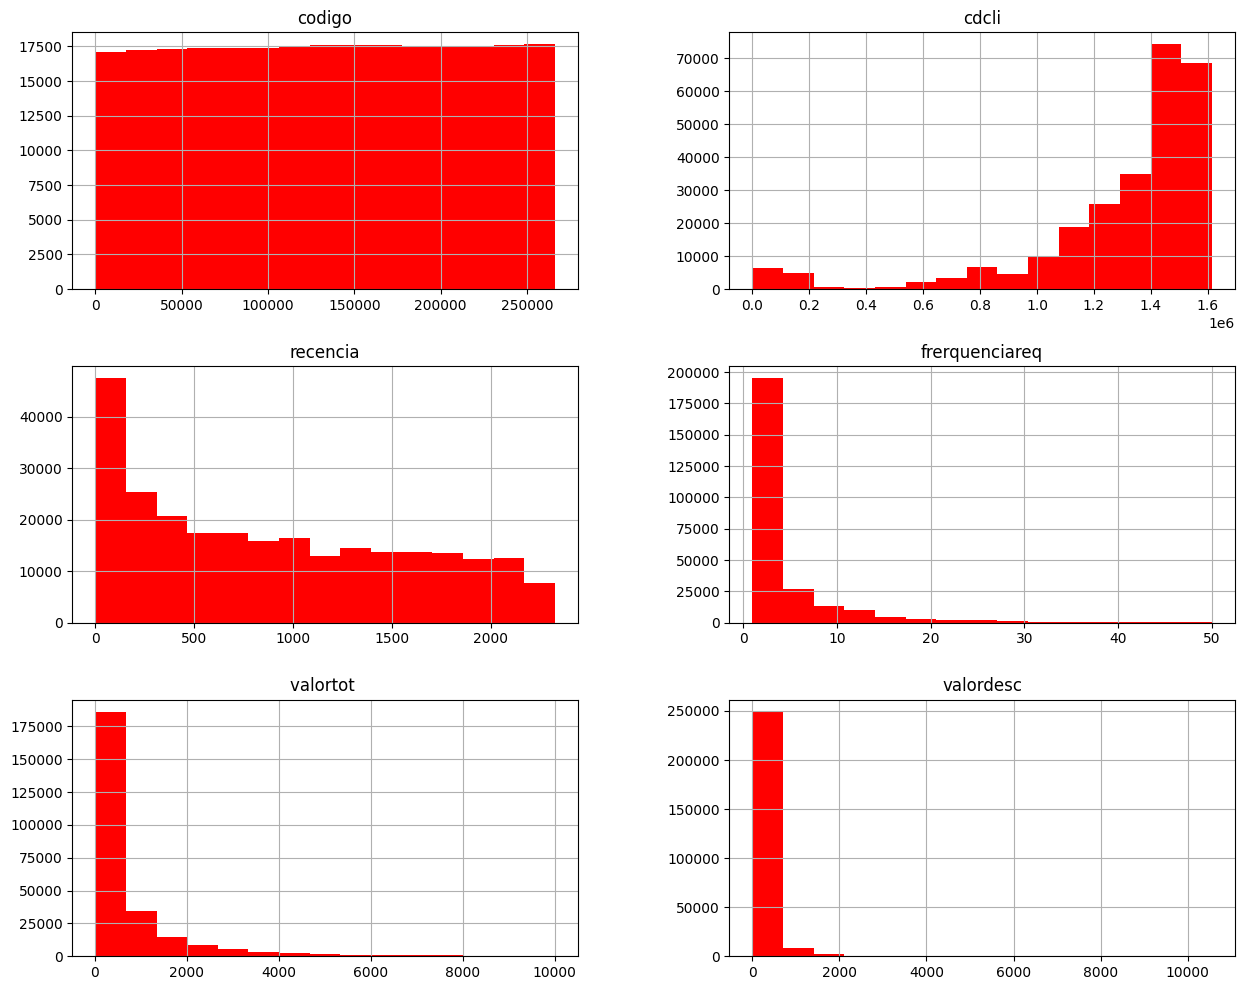

In [11]:
# Copiando o Dataset e removendo os dados de Outliers

df_clean = df.copy()
df_clean.drop(df_clean[df_clean.frerquenciareq > 50].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean['valortot ']> 10000].index, axis=0, inplace=True)

df_clean.hist(bins = 15, figsize = (15,12), color = 'red')
plt.show()

In [12]:
# Tamanho do Dataset após a limpeza

df_clean.shape

(261631, 11)

### **Plotando e analisando os *Boxplots* sem outliers**

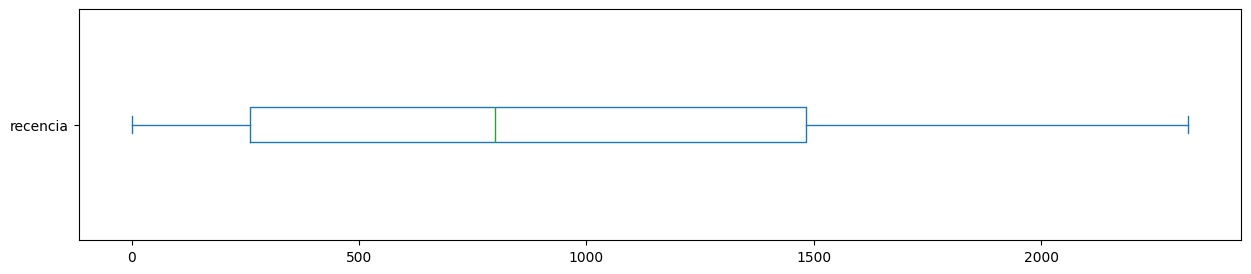

In [13]:
# analisando a recencia sem outliers

df_clean.recencia.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

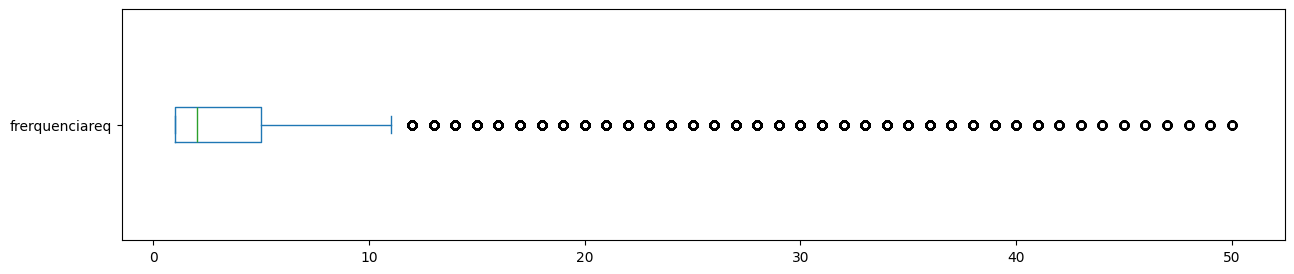

In [14]:
# analisando a Frequenciareq

df_clean.frerquenciareq.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

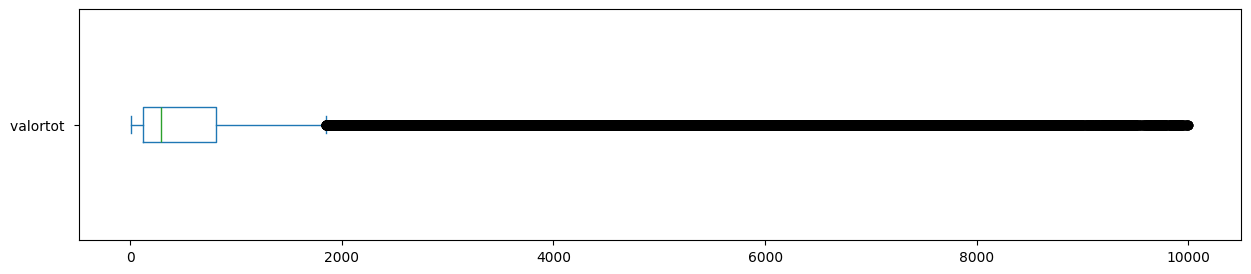

In [15]:
# analisando a Frequenciareq

df_clean['valortot '].plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

Ainda percebemos alguns *outliers* mas em uma quantidade bem menor do que anteriormente.

Para finalizar a exploração dos dados, irei analisar a correlação dos dados.

### **Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [16]:
corr = df_clean[['valortot ', 'frerquenciareq', 'recencia']].corr()
display(corr)

,valortot,frerquenciareq,recencia
valortot,1.000000,0.795964,-0.342762
frerquenciareq,0.795964,1.000000,-0.350312
recencia,-0.342762,-0.350312,1.000000


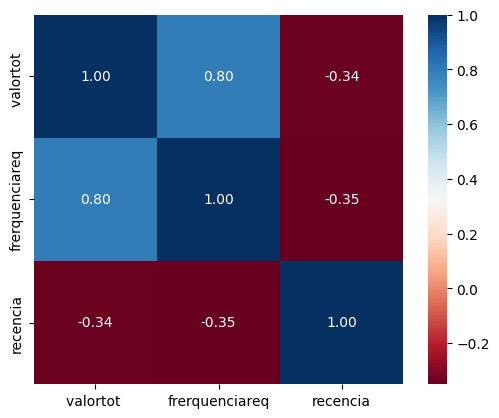

In [17]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Para finalizar a Análise Exploratória, ploto aqui um gráfico para ver o Valor Gasto por estado dividido por sexo.

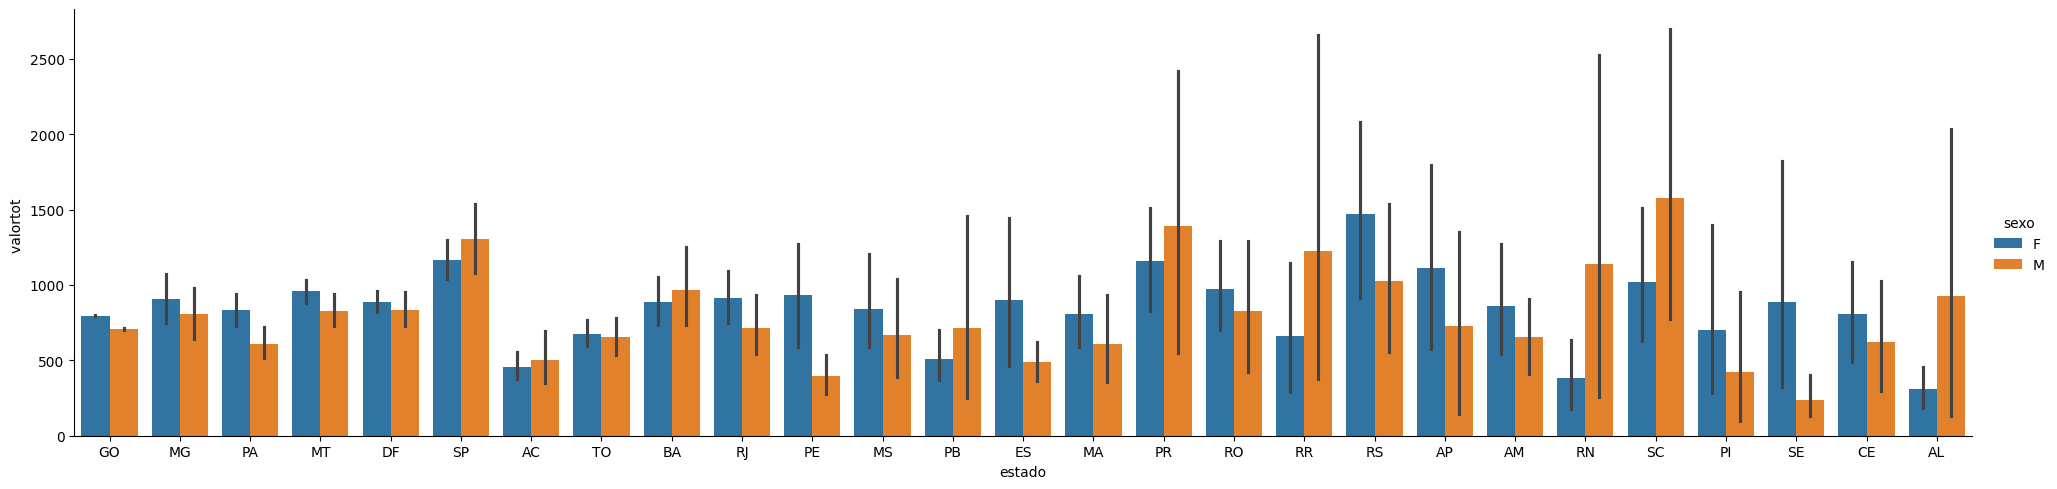

In [18]:
sns.catplot(data = df_clean, kind = 'bar', x = 'estado', y = 'valortot ', hue = 'sexo', height=5, aspect = 4 )

Finalizamos aqui a Análise Exploratória dos dados, vamos iniciar agora a clusterização propriamente dita...

## Iniciando a Clusterização

In [19]:
# criando uma cópia do dataframe
df_clean1 = df_clean.drop(labels = ['nome', 'codigo', 'municipio', 'estado', 'sexo', 'bairro', 'valordesc'], axis = 1 ).set_index(['cdcli'])
df_clean1.head()

,recencia,frerquenciareq,valortot
cdcli,,,
2,176,46,5693.85
6,1183,3,179.80
13,1740,3,160.40
31,5,15,2206.90
32,1262,36,4957.06


In [20]:
x = df_clean1.values

### Aplicando o PCA

In [21]:
pca = PCA(n_components=2).fit_transform(x)
projection = pd.DataFrame(columns = ['x', 'y'], data = pca)
projection.head()

,x,y
0,4949.826614,482.384099
1,-644.385963,128.922761
2,-797.631258,664.778147
3,1607.113683,-525.063157
4,3972.700906,1358.476867


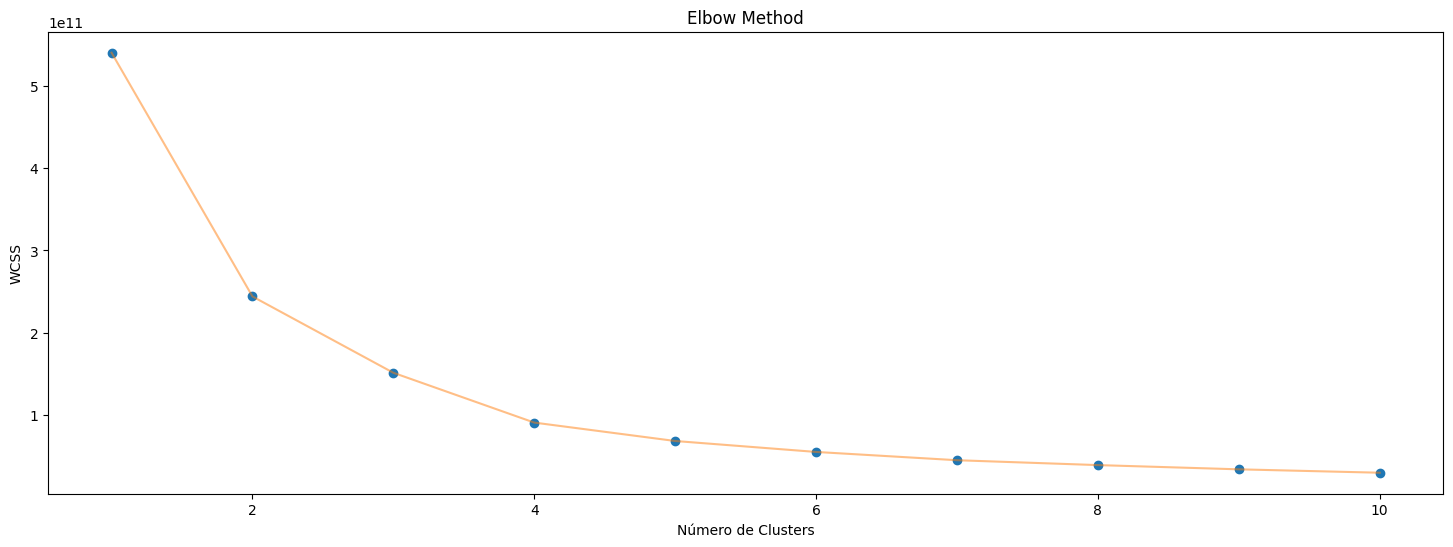

In [22]:
fig,ax = plt.subplots(figsize=(18,6))
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(pca)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss, 'o')
plt.plot(range(1 , 11) , wcss , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
# Instanciando o Modelo
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(pca)

In [24]:
# Criando uma coluna de Clusters
df_clean1['Cluster'] = kmeans.labels_

df_clean1.head()

,recencia,frerquenciareq,valortot,Cluster
cdcli,,,,
2,176,46,5693.85,2
6,1183,3,179.80,0
13,1740,3,160.40,0
31,5,15,2206.90,3
32,1262,36,4957.06,4


In [25]:
df_clean1.groupby('Cluster').count()

,recencia,frerquenciareq,valortot
Cluster,,,
0,98109,98109,98109
1,110314,110314,110314
2,4873,4873,4873
3,35060,35060,35060
4,13275,13275,13275


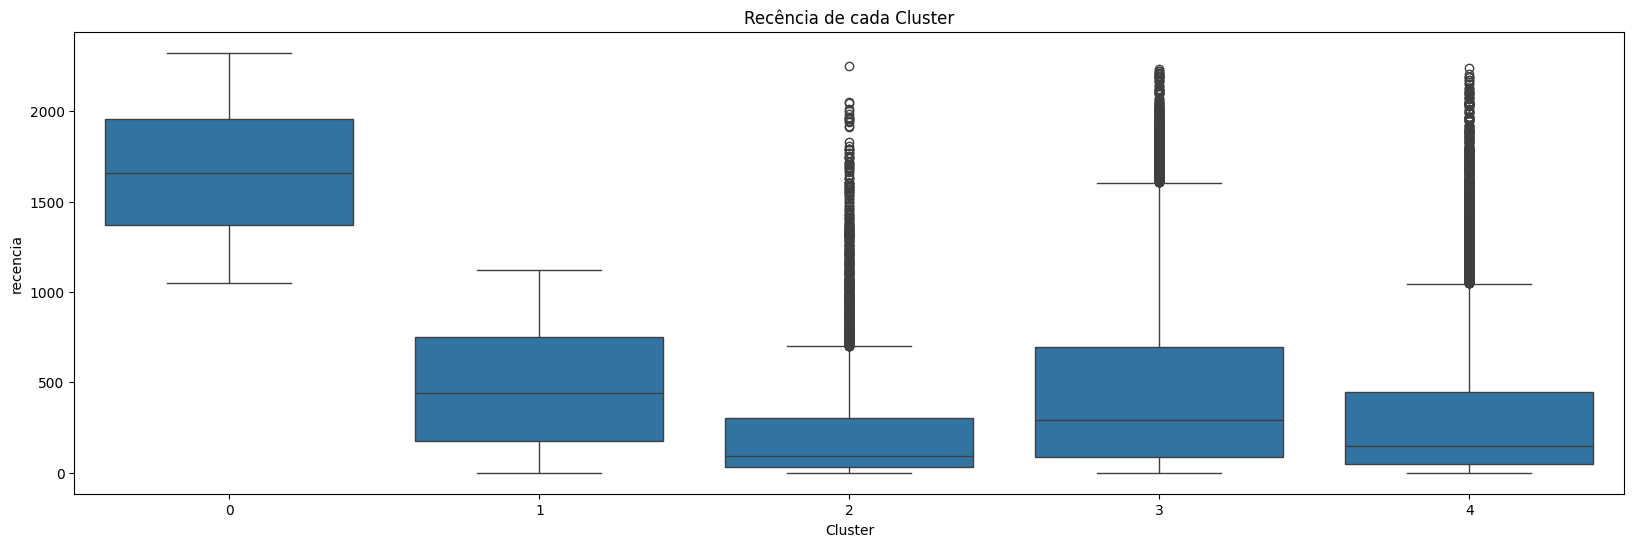

In [26]:
# Analisando a Recência
fig, ax = plt.subplots(figsize=(20,6))
plt.title('Recência de cada Cluster')
sns.boxplot(x = df_clean1.Cluster, y = df_clean1.recencia);

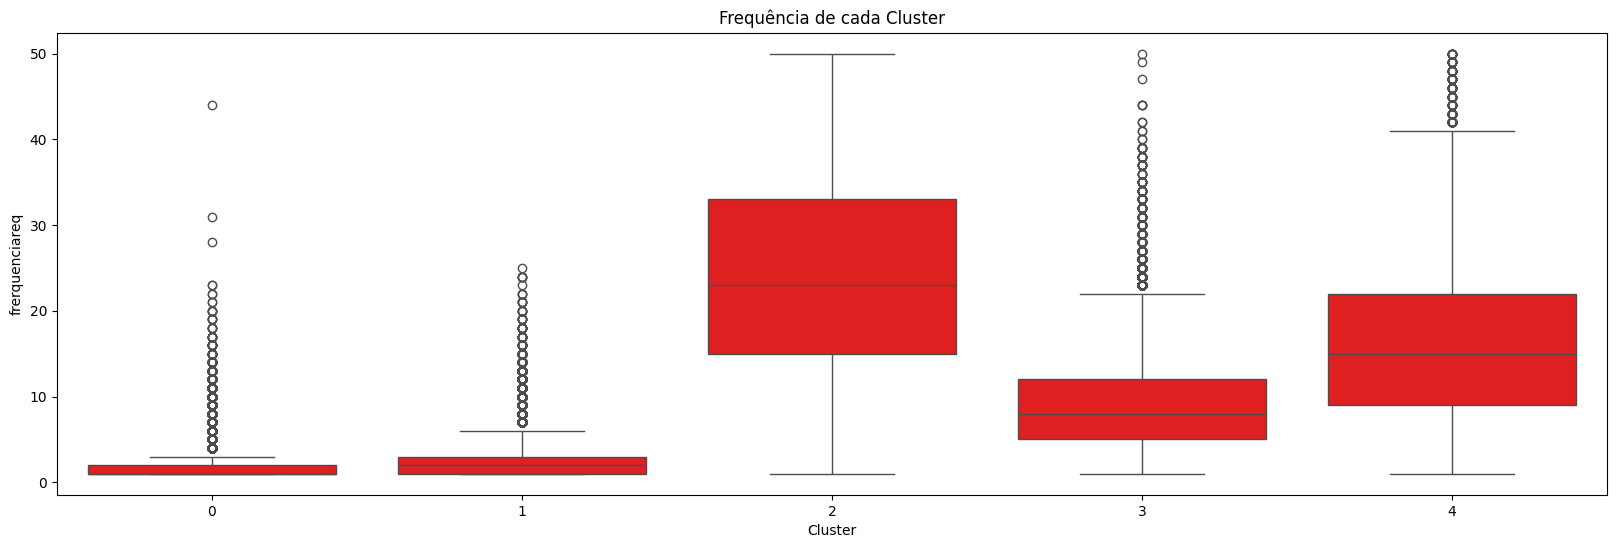

In [27]:
# Analisando a Recência
fig, ax = plt.subplots(figsize=(20,6))
plt.title('Frequência de cada Cluster')
sns.boxplot(x = df_clean1.Cluster, y = df_clean1.frerquenciareq, color = 'red');

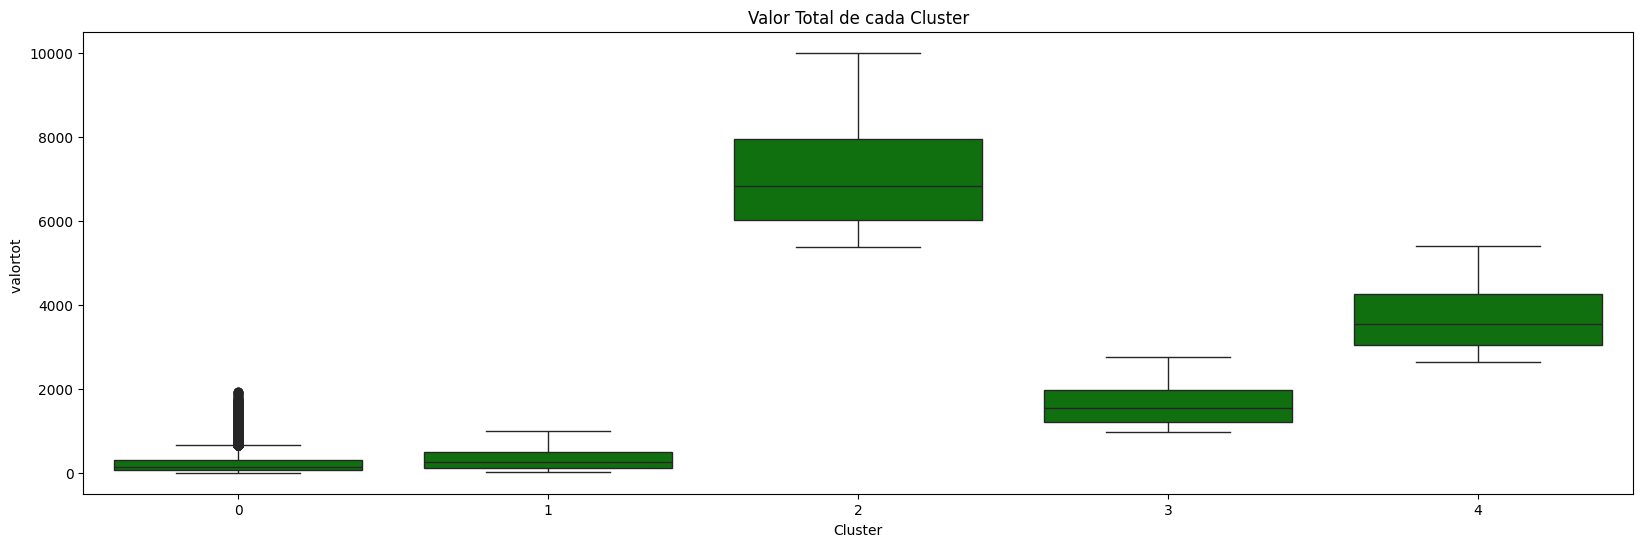

In [28]:
# Analisando a Recência
fig, ax = plt.subplots(figsize=(20,6))
plt.title('Valor Total de cada Cluster')
sns.boxplot(x = df_clean1.Cluster, y = df_clean1['valortot '], color = 'green');

In [29]:
def cliente(df_clean1):
    if df_clean1['Cluster'] == 0:
        return "Cliente Bronze"

    if df_clean1['Cluster'] == 1:
        return "Cliente Prata"

    if df_clean1['Cluster'] == 2:
        return "Cliente Premium"

    if df_clean1['Cluster'] == 3:
        return "Cliente Ouro"

    if df_clean1['Cluster'] == 4:
        return "Cliente Platinum"

df_clean1['Cliente'] = df_clean1.apply(cliente, axis=1)
df_clean1.head()

,recencia,frerquenciareq,valortot,Cluster,Cliente
cdcli,,,,,
2,176,46,5693.85,2,Cliente Premium
6,1183,3,179.80,0,Cliente Bronze
13,1740,3,160.40,0,Cliente Bronze
31,5,15,2206.90,3,Cliente Ouro
32,1262,36,4957.06,4,Cliente Platinum


In [30]:
df_clean1.groupby('Cliente').mean()

,recencia,frerquenciareq,valortot,Cluster
Cliente,,,,
Cliente Bronze,1663.255298,1.875526,245.107848,0.0
Cliente Ouro,438.445037,8.868369,1630.174516,3.0
Cliente Platinum,320.100113,16.572580,3703.928742,4.0
Cliente Prata,472.532915,2.544663,341.351833,1.0
Cliente Premium,238.443054,24.286682,7076.298603,2.0


<Axes: xlabel='x', ylabel='y'>

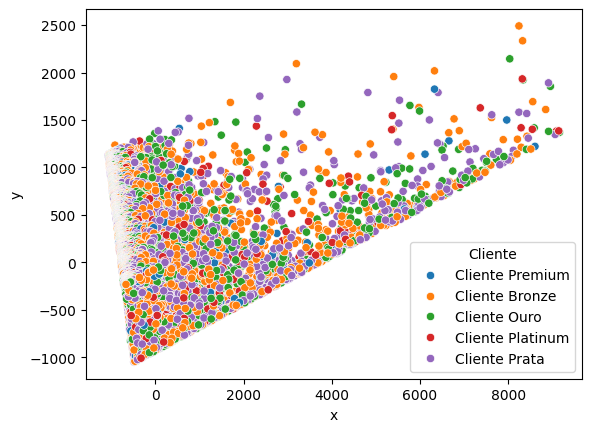

In [31]:
sns.scatterplot(x = projection.x, y = projection.y, hue = df_clean1.Cliente)

<Axes: xlabel='recencia', ylabel='valortot '>

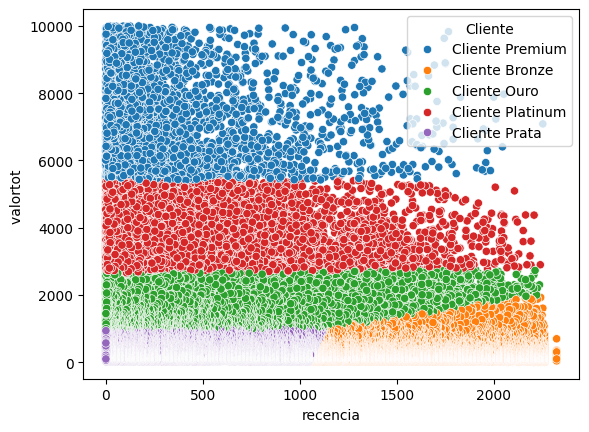

In [32]:
sns.scatterplot(x = df_clean1.recencia, y = df_clean1['valortot '], hue = df_clean1.Cliente,  )

In [33]:
# argumentos (x = value, p = recency, monetary_value, frequency, d = quartiles dict)

# Quanto menor a Recência, melhor!
def RScore(x,p,d):
    if x <= d[p][0.22]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.98]:
        return 3
    else:
        return 4


# argumentos (x = value, p = recency, monetary_value, frequency, k = quartiles dict)

# Quanto maior o valor da frequência e valor gasto, melhor!
def FMScore(x,p,d):
    if x <= d[p][0.22]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.98]:
        return 2
    else:
        return 1

In [34]:
# Quartis Significantes
quantile = df_clean1.quantile([0.22, 0.5, 0.98], numeric_only=True)
quantile

,recencia,frerquenciareq,valortot,Cluster
0.22,212.0,1.0,108.00,0.0
0.50,798.0,2.0,293.00,1.0
0.98,2197.0,25.0,5241.42,4.0


In [35]:
# Identificando os Quartis
df_clean1['R_Quartile'] = df_clean1['recencia'].apply(RScore,args=('recencia',quantile))
df_clean1['F_Quartile'] = df_clean1['frerquenciareq'].apply(FMScore, args=('frerquenciareq',quantile))
df_clean1['M_Quartile'] = df_clean1['valortot '].apply(FMScore, args=('valortot ',quantile))

In [36]:
# Calculando o RFM score
df_clean1['RFMScore'] = df_clean1.R_Quartile.map(str) + df_clean1.F_Quartile.map(str) + df_clean1.M_Quartile.map(str)
df_clean1.head(10)

,recencia,frerquenciareq,valortot,Cluster,Cliente,R_Quartile,F_Quartile,M_Quartile,RFMScore
cdcli,,,,,,,,,
2,176,46,5693.85,2,Cliente Premium,1,1,1,111
6,1183,3,179.80,0,Cliente Bronze,3,2,3,323
13,1740,3,160.40,0,Cliente Bronze,3,2,3,323
31,5,15,2206.90,3,Cliente Ouro,1,2,2,122
32,1262,36,4957.06,4,Cliente Platinum,3,1,2,312
36,1740,2,95.00,0,Cliente Bronze,3,3,4,334
37,827,2,120.00,1,Cliente Prata,3,3,3,333
66,359,21,2887.00,4,Cliente Platinum,2,2,2,222
77,932,4,617.00,1,Cliente Prata,3,2,2,322


In [40]:
df_clean1['RFMScore'] = df_clean1['RFMScore'].astype('int64')

In [47]:
def classificador(df_clean1):
    if df_clean1['RFMScore'] == 111:
        return "Campeão"

    elif df_clean1['RFMScore'] == 121:
        return "Cliente com potencial para Campeão"

    elif df_clean1['RFMScore'] == 122:
        return "Cliente Novo que já conhece a marca"

    elif df_clean1['RFMScore'] == 123:
        return "Cliente que pode ser fidelizado"

    elif df_clean1['RFMScore'] == 124:
        return "Cliente promessa"

    elif df_clean1['RFMScore'] == 112:
        return "Cliente Fiel"

    elif df_clean1['RFMScore'] == 113:
        return "Cliente Leal"

    elif df_clean1['RFMScore'] == 141:
        return "Cliente suscetível a promoção"

    elif df_clean1['RFMScore'] == 142:
        return "Cliente novo"

    elif df_clean1['RFMScore'] == 143:
        return "Cliente novo"

    elif df_clean1['RFMScore'] == 144:
        return "Cliente novo"

    elif df_clean1['RFMScore'] == 211:
        return "Cliente em Risco"

    elif df_clean1['RFMScore'] == 221:
        return "Cliente que não posso perder"

    elif df_clean1['RFMScore'] == 222:
        return "Cliente Hibernado"

    elif df_clean1['RFMScore'] == 223:
        return "Cliente Hibernado"

    elif df_clean1['RFMScore'] == 224:
        return "Cliente Hibernado"

    elif df_clean1['RFMScore'] == 241:
        return "Cliente Precisando de Atenção"

    elif df_clean1['RFMScore'] == 242:
        return "Cliente Dormente"

    elif df_clean1['RFMScore'] == 244:
        return "Cliente Dormente"

    elif df_clean1['RFMScore'] == 243:
        return "Cliente Dormente"

    elif df_clean1['RFMScore'] == 311:
        return "Cliente em Risco"

    elif df_clean1['RFMScore'] == 321:
        return "Cliente que pode ser descongelado"

    elif df_clean1['RFMScore'] == 322:
        return "Cliente quase esquecido"

    elif df_clean1['RFMScore'] == 323:
        return "Cliente quase esquecido"

    elif df_clean1['RFMScore'] == 333:
        return "Cliente de Compra Única"

    elif df_clean1['RFMScore'] == 334:
        return "Cliente de Compra Única"

    elif df_clean1['RFMScore'] == 343:
        return "Cliente esquecido"

    elif df_clean1['RFMScore'] == 344:
        return "Cliente perdido"

    elif df_clean1['RFMScore'] == 444:
        return "Cliente perdido"

    elif df_clean1['RFMScore'] == 411:
        return "Cliente Campeão Esquecido"

    else:
        return  "Avaliar"


df_clean1['Classe'] = df_clean1.apply(classificador,axis=1)

df_clean1.head(10)

,level_0,index,recencia,frerquenciareq,valortot,Cluster,Cliente,R_Quartile,F_Quartile,M_Quartile,RFMScore,Classe
cdcli,,,,,,,,,,,,
2,0,0,176,46,5693.85,2,Cliente Premium,1,1,1,111,Campeão
6,1,1,1183,3,179.80,0,Cliente Bronze,3,2,3,323,Cliente quase esquecido
13,2,2,1740,3,160.40,0,Cliente Bronze,3,2,3,323,Cliente quase esquecido
31,3,3,5,15,2206.90,3,Cliente Ouro,1,2,2,122,Cliente Novo que já conhece a marca
32,4,4,1262,36,4957.06,4,Cliente Platinum,3,1,2,312,Avaliar
36,5,5,1740,2,95.00,0,Cliente Bronze,3,3,4,334,Cliente de Compra Única
37,6,6,827,2,120.00,1,Cliente Prata,3,3,3,333,Cliente de Compra Única
66,7,7,359,21,2887.00,4,Cliente Platinum,2,2,2,222,Cliente Hibernado
77,8,8,932,4,617.00,1,Cliente Prata,3,2,2,322,Cliente quase esquecido
